## Predicting Box Office Revenue Using TMDB Dataset

## Content 

###     [Loading Data](#chapter0)
### 1. [Handling Missing Values](#chapter1)
### 2. [Formatting Date Values](#chapter2)
### 3. [Exploratory Data Analysis](#chapter3)
### 4. [Feature Engineering](#chapter4)
### 5. [Random Forest Model](#chapter5)
### 6. [XGBoost Model](#chapter6)
### 7. [Final Model](#chapter7)

### Importing Libraries

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import ast 
from sklearn.ensemble import RandomForestRegressor # ML
from sklearn.inspection import permutation_importance # computing feature importance
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
import missingno as msno



### Loading Data
<a class="anchor" id="chapter0"></a>

In [4]:
tmdf = pd.read_csv('tmdb.csv')

In [5]:
tmdf.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


## 1. Handling Missing Values

<a class="anchor" id="chapter1"></a>

In [6]:
tmdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

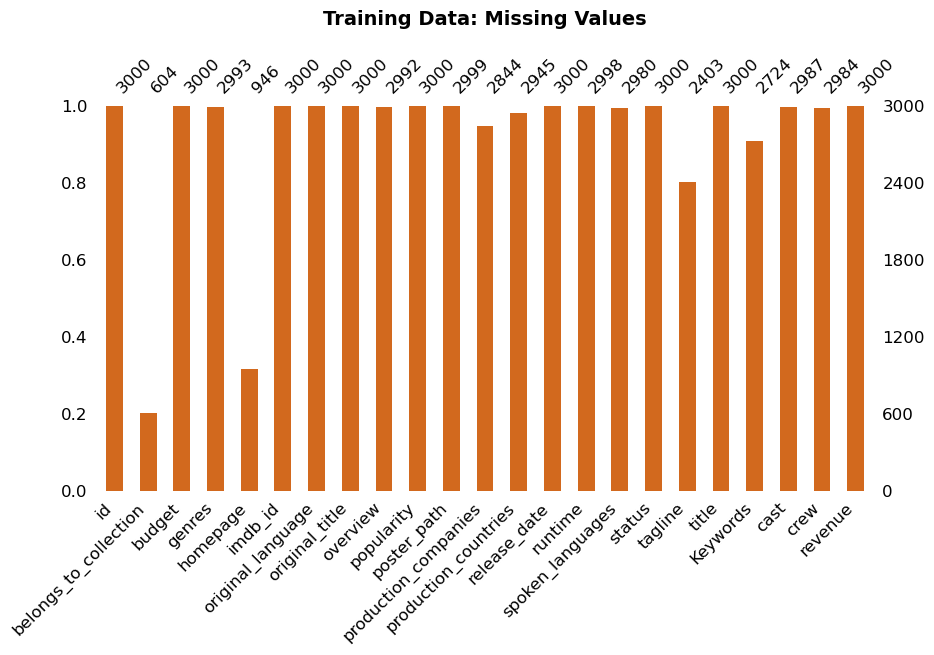

In [10]:
tmdf_miss = msno.bar(tmdf, figsize=(10,5), fontsize=12, color= 'chocolate').set_title('Training Data: Missing Values' '\n', fontweight="bold", fontsize=14)

In [13]:
# For nominal data, replacing the missing values with "none"

tmdf[['genres',
       'original_language', 
       'spoken_languages', 
       'status', 
       'production_countries', 
       'production_companies', 
       'cast',
       'crew']] = tmdf[['genres',
         'original_language', 
         'spoken_languages',
         'status', 
         'production_countries',
         'production_companies', 
         'cast',
         'crew']].fillna("none")


In [14]:
# For numerical data, replacing the missing values with the mean
tmdf['runtime'] = tmdf['runtime'].fillna(tmdf['runtime'].mean())
tmdf['runtime'].isnull().any()

False

## 2. Formatting the dates

<a class="anchor" id="chapter2"></a>

In [15]:
# Converting the format of the date and creating new year, day, and month columns

tmdf['release_date'] = pd.to_datetime(tmdf['release_date'], format='%m/%d/%y')

tmdf["release_year"] = pd.to_datetime(tmdf["release_date"]).dt.year.astype(int)
tmdf["release_day"] = pd.to_datetime(tmdf["release_date"]).dt.dayofweek.astype(int)
tmdf["release_month"] = pd.to_datetime(tmdf["release_date"]).dt.month.astype(int)


In [17]:
# Check the max range if release year
tmdf['release_year'].max()

2068

In [19]:
# Fixing the dates
def fix_date(x):
    if x > 2019:
        return x - 100
    else:
        return x 

tmdf['release_year'] = tmdf['release_year'].apply(lambda x: fix_date(x))

## 3. Exploratory Data Analysis

<a class="anchor" id="chapter3"></a>

### Univariate Analysis: Revenue

<Axes: >

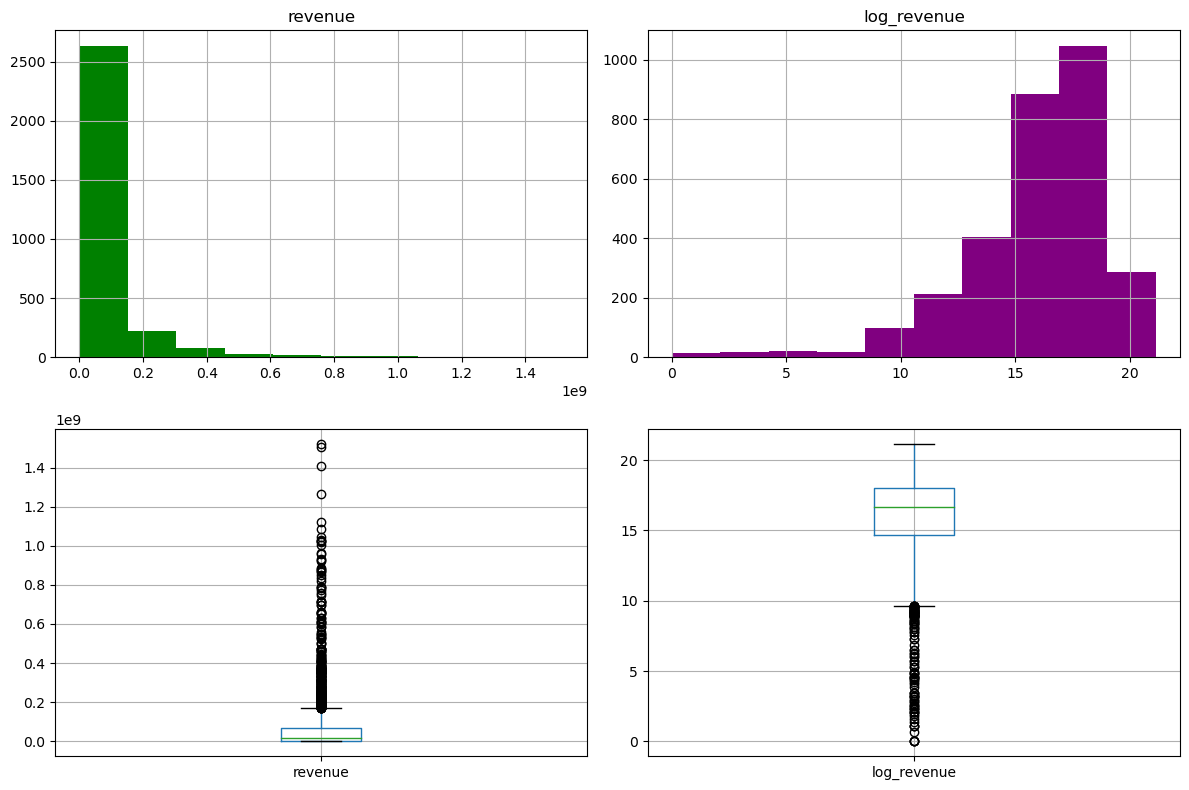

In [20]:
 tmdf['log_revenue'] = np.log(tmdf['revenue'])

fig, ax = plt.subplots(2, 2, figsize = (12, 8), tight_layout=True)
tmdf.hist(column= ["revenue"], ax=ax[0][0], color='green')
tmdf.hist(column= ['log_revenue'], ax=ax[0][1], color='purple')
tmdf.boxplot(column= ["revenue"], ax=ax[1][0])
tmdf.boxplot(column= ['log_revenue'], ax=ax[1][1])

### Univariate Analysis: Budget & Popularity

<Axes: >

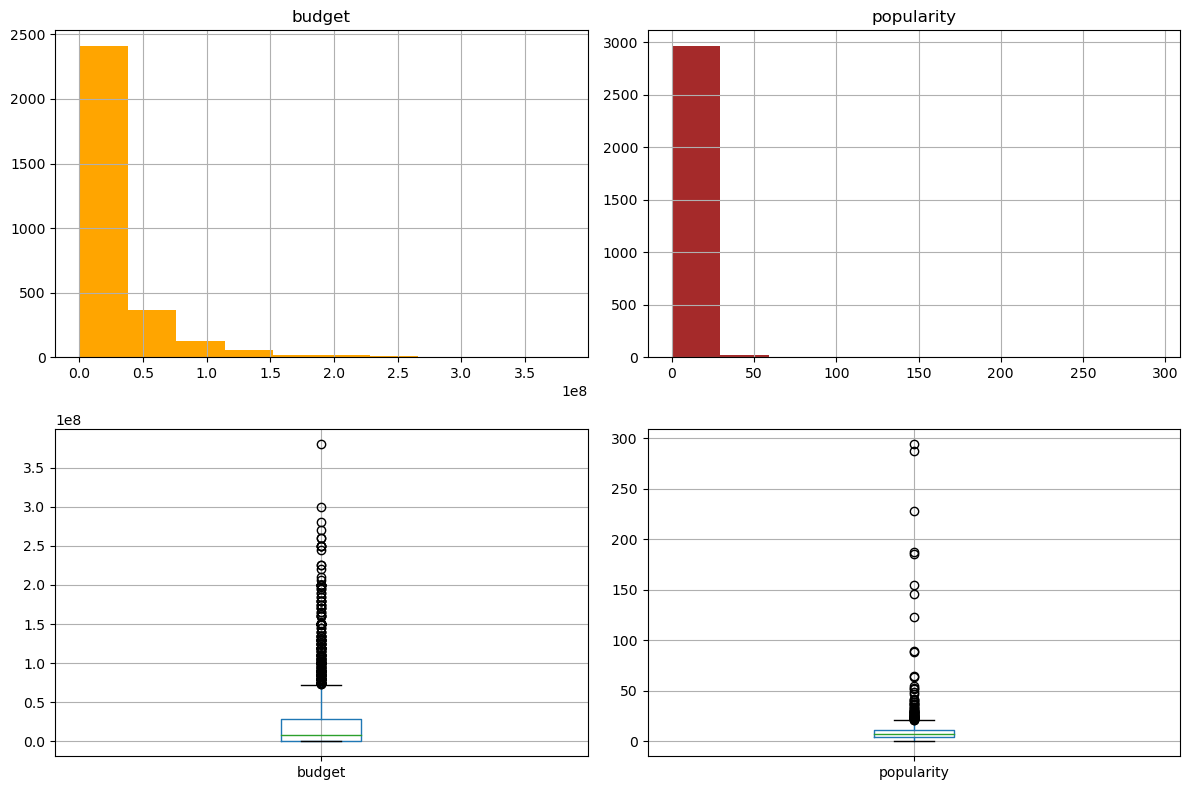

In [21]:
fig, ax = plt.subplots(2, 2, figsize = (12, 8), tight_layout=True)
tmdf.hist(column= ["budget"], ax=ax[0][0], color='orange')
tmdf.hist(column= ['popularity'], ax=ax[0][1], color='brown')
tmdf.boxplot(column= ['budget'], ax=ax[1][0])
tmdf.boxplot(column= ['popularity'], ax=ax[1][1])

### Univariate Analysis: Runtime & Release Year 

<Axes: >

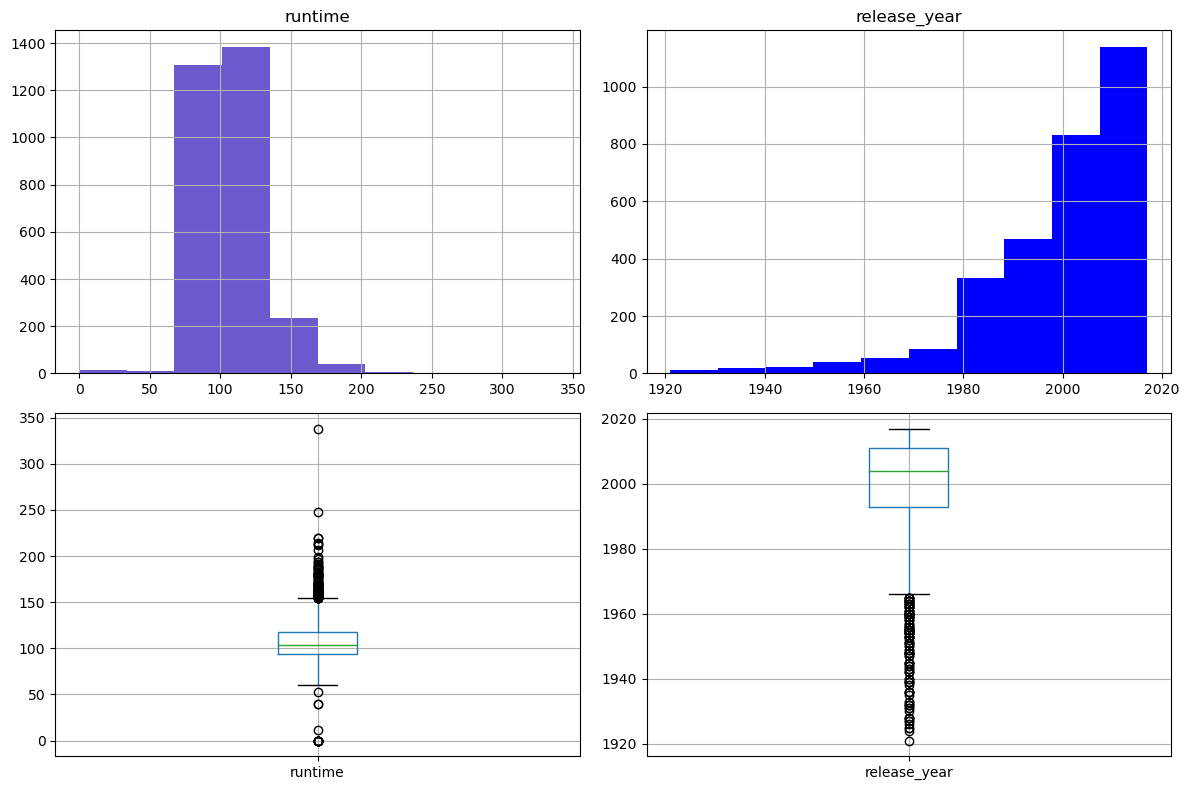

In [22]:
fig, ax = plt.subplots(2, 2, figsize = (12, 8), tight_layout=True)
tmdf.hist(column= ["runtime"], ax=ax[0][0], color='slateblue')
tmdf.hist(column= ['release_year'], ax=ax[0][1], color='blue')
tmdf.boxplot(column= ['runtime'], ax=ax[1][0])
tmdf.boxplot(column= ['release_year'], ax=ax[1][1])


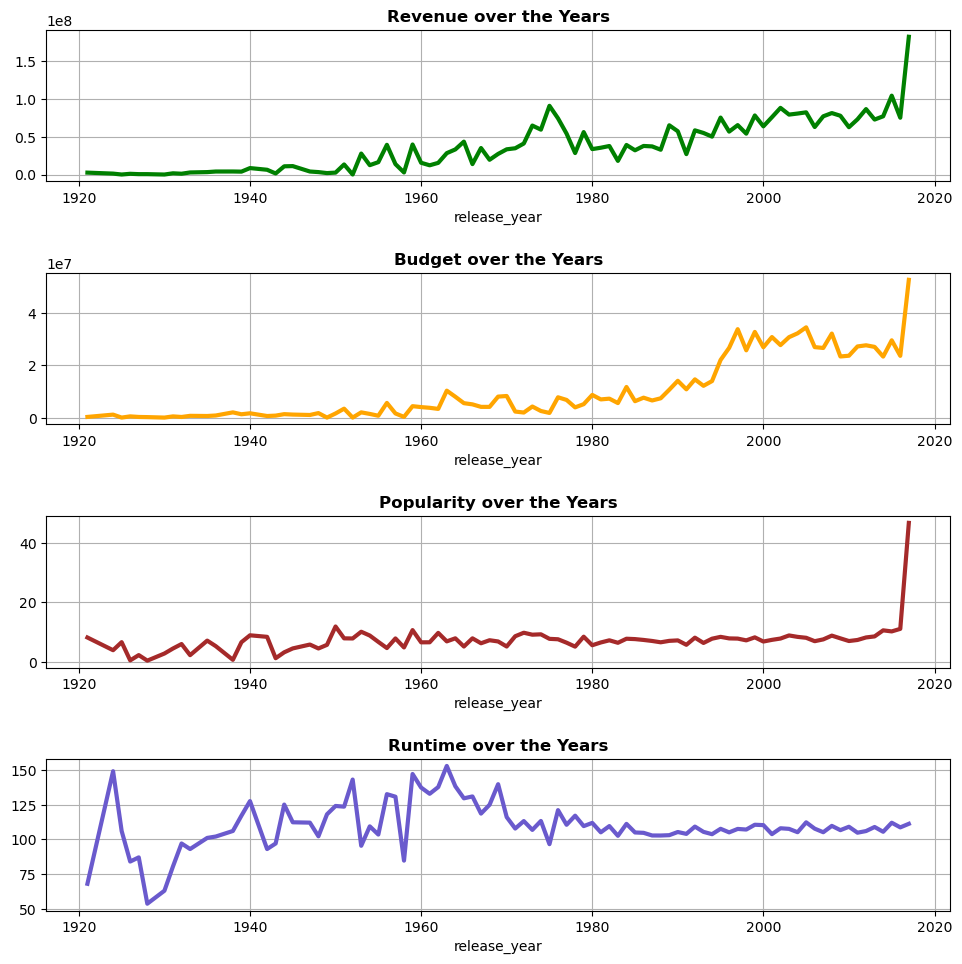

In [16]:

fig, ax = plt.subplots(4, 1, tight_layout=True)
plt.grid()

tmdf.groupby('release_year')['revenue'].mean().plot(ax=ax[0], figsize=(10, 10), linewidth=3, color='green').set_title('Revenue over the Years', fontweight="bold")
ax[0].grid()

tmdf.groupby('release_year')['budget'].mean().plot(ax=ax[1], figsize=(10, 10), linewidth=3, color='orange').set_title('Budget over the Years', fontweight="bold")
ax[1].grid()

tmdf.groupby('release_year')['popularity'].mean().plot(ax=ax[2], figsize=(10, 10), linewidth=3, color='brown').set_title('Popularity over the Years', fontweight="bold")
ax[2].grid()

tmdf.groupby('release_year')['runtime'].mean().plot(ax=ax[3], figsize=(10, 10), linewidth=3, color='slateblue').set_title('Runtime over the Years', fontweight="bold")
ax[3].grid()

fig.tight_layout(pad=2.0)
plt.show()

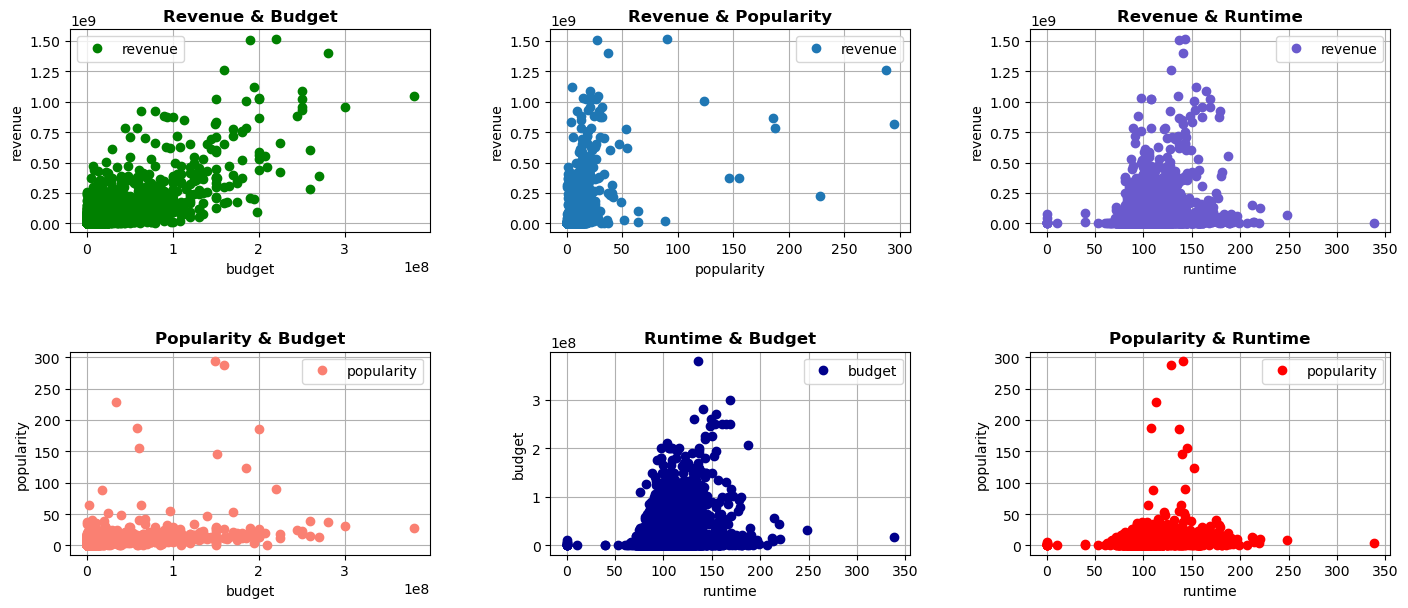

In [23]:
fig, ax = plt.subplots(2, 3, figsize=(15, 7), tight_layout=True)

tmdf.plot(ax=ax[0][0], x='budget', y='revenue', style='o', ylabel= 'revenue', color='green').set_title('Revenue & Budget', fontweight="bold")
ax[0][0].grid()

tmdf.plot(ax=ax[0][1], x='popularity', y='revenue', style='o', ylabel= 'revenue').set_title('Revenue & Popularity', fontweight="bold")
ax[0][1].grid()

tmdf.plot(ax=ax[0][2], x='runtime', y='revenue', style='o', ylabel= 'revenue', color='slateblue').set_title('Revenue & Runtime', fontweight="bold")
ax[0][2].grid()

tmdf.plot(ax=ax[1][0], x='budget', y='popularity', style='o', ylabel= 'popularity', color='salmon').set_title('Popularity & Budget', fontweight="bold")
ax[1][0].grid()

tmdf.plot(ax=ax[1][1], x='runtime', y='budget', style='o', ylabel= 'budget', color='DarkBlue').set_title('Runtime & Budget', fontweight="bold")
ax[1][1].grid()

tmdf.plot(ax=ax[1][2], x='runtime', y='popularity', style='o', ylabel= 'popularity', color='red').set_title('Popularity & Runtime', fontweight="bold")
ax[1][2].grid()

fig.tight_layout(pad=4.0)
plt.show()

## 4. Feature Engineering

<a class="anchor" id="chapter4"></a>


### Looking for unfit data 

In [25]:
# As these featurs were not fitting in the dtaset, these features are in json format.  
for e in enumerate(tmdf['genres'][:10]):
    print(e)

(0, "[{'id': 35, 'name': 'Comedy'}]")
(1, "[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]")
(2, "[{'id': 18, 'name': 'Drama'}]")
(3, "[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]")
(4, "[{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]")
(5, "[{'id': 16, 'name': 'Animation'}, {'id': 12, 'name': 'Adventure'}, {'id': 10751, 'name': 'Family'}]")
(6, "[{'id': 27, 'name': 'Horror'}, {'id': 53, 'name': 'Thriller'}]")
(7, "[{'id': 99, 'name': 'Documentary'}]")
(8, "[{'id': 28, 'name': 'Action'}, {'id': 35, 'name': 'Comedy'}, {'id': 10402, 'name': 'Music'}, {'id': 10751, 'name': 'Family'}, {'id': 12, 'name': 'Adventure'}]")
(9, "[{'id': 35, 'name': 'Comedy'}, {'id': 10402, 'name': 'Music'}]")


### First, I am converting the features in Json format to nominal format


In [26]:
def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

In [28]:
tmdf.genres = tmdf.genres.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
tmdf.spoken_languages = tmdf.spoken_languages.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
tmdf.cast = tmdf.cast.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
tmdf.crew = tmdf.crew.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))

tmdf.crew.head()

0    Adam Blum,Allison Gordin,Andrew Panay,Annabell...
1    Bruce Green,Charles Minsky,Debra Martin Chase,...
2    Alicia Hadaway,Andy Ross,Barbara Harris,Ben Wi...
3                  Sujoy Ghosh,Sujoy Ghosh,Sujoy Ghosh
4                        Jong-seok Yoon,Jong-seok Yoon
Name: crew, dtype: object

In [29]:
# Then, I am counting the occurances in those features which I plan to use in the model, unless they are not redundant.
# For instance, one might expect higher revenue from a movie if that movie was produced in several spoken languages and/or had a more crowded crew. 

tmdf['genres_count'] = tmdf['genres'].str.count(',') + 1
tmdf['spoken_languages_count'] = tmdf['spoken_languages'].str.count(',') + 1
tmdf['cast_count'] = tmdf['cast'].str.count(',') + 1
tmdf['crew_count'] = tmdf['crew'].str.count(',') + 1

tmdf['genres_count']

0       1
1       4
2       1
3       2
4       2
       ..
2995    2
2996    2
2997    4
2998    2
2999    3
Name: genres_count, Length: 3000, dtype: int64

### Converting nominal data to numberical data 

In [30]:
tmdf[['status', 
      'original_language', 
      'production_companies', 
      'production_countries']] = tmdf[['status', 
               'original_language', 
               'production_companies',
               'production_countries']].astype('category')

tmdf['status'] = tmdf['status'].cat.codes
tmdf['original_language'] = tmdf['original_language'].cat.codes
tmdf['production_companies'] = tmdf['production_companies'].cat.codes
tmdf['production_countries'] = tmdf['production_countries'].cat.codes


tmdf['production_countries']

0       316
1       316
2       316
3       210
4       236
       ... 
2995    316
2996    111
2997    316
2998    316
2999    316
Name: production_countries, Length: 3000, dtype: int16

### Issue with Budget

In [31]:
# Budget has zero values for many movies including some high budget movies. 
# Additionally, it does not make sense to have movies with 0 runtimes. 
# I am changing those zero values with mean. 
tmdf['budget'] = tmdf['budget'].replace(0, tmdf['budget'].mean())  
tmdf['runtime'] = tmdf['runtime'].replace(0, tmdf['runtime'].mean())  


In [32]:
# Assigning the data corresponding to the target and predictor variables
y = tmdf['log_revenue']
X = tmdf.drop(['log_revenue', 'revenue'], axis=1)

In [34]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [35]:
# Creating the list of features
feature_names = ['release_year', 'release_day', 'release_month', 'status', 'original_language',
                 'budget', 'popularity', 'genres_count', 'production_companies', 'production_countries',
                'spoken_languages_count', 'cast_count', 'crew_count', 'runtime']

# Assigning the data corresponding to features in feature_names
X_train_full = X_train_full[feature_names]

X_valid_full = X_valid_full[feature_names]

X_train_full.head()

,release_year,release_day,release_month,status,original_language,budget,popularity,genres_count,production_companies,production_countries,spoken_languages_count,cast_count,crew_count,runtime
2370,2012,1,3,0,7,150000000.0,7.739904,1,1012,121,1,18,31,99.0
1774,2001,4,10,0,7,35000000.0,7.790140,3,1997,80,3,26,65,122.0
731,1967,6,12,0,7,4000000.0,5.032469,3,1712,316,1,18,25,108.0
271,2006,4,8,0,7,72500000.0,6.936688,1,385,316,1,24,14,116.0
1077,1980,4,8,0,7,20000000.0,3.782547,3,2168,316,1,19,15,96.0


## 5. Random Forest Model

<a class="anchor" id="chapter5"></a>

In [1]:
# Defining the Random Forest Model 
rf_model = RandomForestRegressor(random_state=1)

# Fitting the model 
rf_model.fit(X_train_full, y_train)

In [37]:
# Prediction
y_pred_rf = rf_model.predict(X_valid_full)

In [38]:
def metrics(y_pred, y_test):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    errors = abs(y_pred - y_test)
    mae = np.mean(errors)

    # Avoid division by zero
    mape = np.where(y_test == 0, 0, 100 * (errors / y_test))
    
    print('Mean Squared Error: ', round(mse, 4))
    print('Root Mean Squared Error: ', round(rmse, 4))
    print('Mean Absolute Error: ', round(mae, 4))

    # Calculate and display accuracy
    test_accuracy = 100 - np.mean(mape)
    print('Test Set Accuracy (from Mean Absolute Percentage Error): {:.1f}%'.format(test_accuracy))

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



In [39]:
metrics(y_pred_rf, y_valid.values)

Mean Squared Error:  4.4871
Root Mean Squared Error:  2.1183
Mean Absolute Error:  1.4083
Test Set Accuracy (from Mean Absolute Percentage Error): 87.1%


C:\Users\DELL\AppData\Local\Temp\ipykernel_10308\3308471941.py:8: RuntimeWarning: divide by zero encountered in divide
  mape = np.where(y_test == 0, 0, 100 * (errors / y_test))


<Axes: >

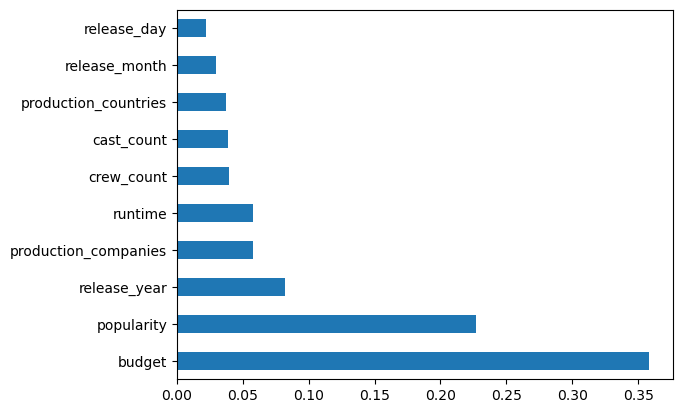

In [42]:
# Calculating feature importance
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train_full.columns)
feat_importances.nlargest(10).plot(kind='barh')

## 6. XGBoost Model

<a class="anchor" id="chapter6"></a>

In [43]:
# Define the model
xgb_model = XGBRegressor(random_state = 42) # Your code here

# Fit the model
xgb_model.fit(X_train_full, y_train.values.ravel()) # Your code here


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [44]:
# Prediction
y_pred_xgb = xgb_model.predict(X_valid_full)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

print('XGBoost Baseline Model Metrics:')
metrics(y_pred_xgb,y_valid.values)

XGBoost Baseline Model Metrics:
Mean Squared Error:  4.9328
Root Mean Squared Error:  2.221
Mean Absolute Error:  1.488
Test Set Accuracy (from Mean Absolute Percentage Error): 86.7%


C:\Users\DELL\AppData\Local\Temp\ipykernel_10308\3308471941.py:8: RuntimeWarning: divide by zero encountered in divide
  mape = np.where(y_test == 0, 0, 100 * (errors / y_test))


<Axes: >

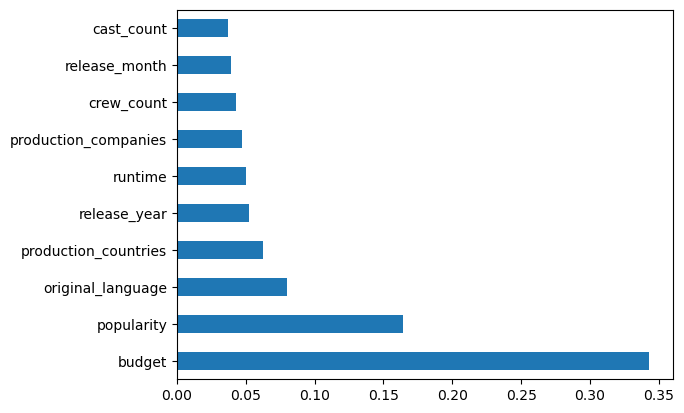

In [47]:
# Calculating feature importance for the XGBoost Model
feat_importances = pd.Series(xgb_model.feature_importances_, index=X_train_full.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [49]:
tmdf.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,crew,revenue,release_year,release_day,release_month,log_revenue,genres_count,spoken_languages_count,cast_count,crew_count
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000.00,Comedy,NaN,tt2637294,7,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,"Adam Blum,Allison Gordin,Andrew Panay,Annabell...",12314651,2015,4,2,16.326300,1,1,24,72
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000.00,"Comedy,Drama,Family,Romance",NaN,tt0368933,7,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,"Bruce Green,Charles Minsky,Debra Martin Chase,...",95149435,2004,4,8,18.370959,4,1,20,9
2,3,NaN,3300000.00,Drama,http://sonyclassics.com/whiplash/,tt2582802,7,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,"Alicia Hadaway,Andy Ross,Barbara Harris,Ben Wi...",13092000,2014,4,10,16.387512,1,1,51,64
3,4,NaN,1200000.00,"Drama,Thriller",http://kahaanithefilm.com/,tt1821480,13,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,"Sujoy Ghosh,Sujoy Ghosh,Sujoy Ghosh",16000000,2012,4,3,16.588099,2,2,7,3
4,5,NaN,22531334.11,"Action,Thriller",NaN,tt1380152,18,마린보이,Marine Boy is the story of a former national s...,1.148070,...,"Jong-seok Yoon,Jong-seok Yoon",3923970,2009,3,2,15.182614,2,1,4,2


## 7. Final Model

<a class="anchor" id="chapter7"></a>

In [52]:
# save model to file
import pickle
pickle.dump(rf_model, open("TMDB_prediction_model.pickle.dat", "wb"))

## Testing the saved model:

In [53]:
# load model from file
loaded_model = pickle.load(open("TMDB_prediction_model.pickle.dat", "rb"))
loaded_model

RandomForestRegressor(random_state=1)

In [73]:
sample_data = {
    'release_year': [2022],
    'release_day': [3],
    'release_month': [12],
    'status': [1],
    'original_language': [2],
    'budget': [50000000.0],
    'popularity': [90.0],
    'genres_count': [2],
    'production_companies': [20],
    'production_countries': [5],
    'spoken_languages_count': [5],
    'cast_count': [12],
    'crew_count': [8],
    'runtime': [120.0]
}

# Create DataFrame with sample data
df_sample = pd.DataFrame(sample_data)

In [74]:
print("Sample Data:")
print(df_sample)

Sample Data:
   release_year  release_day  release_month  status  original_language  \
0          2022            3             12       1                  2   

       budget  popularity  genres_count  production_companies  \
0  50000000.0        90.0             2                    20   

   production_countries  spoken_languages_count  cast_count  crew_count  \
0                     5                       5          12           8   

   runtime  
0    120.0  


### <span style="color:red">Prediction</span>

In [77]:
# Extract the features for prediction
X_sample = df_sample[feature_names]

# Make predictions
predicted_log_revenue = loaded_model.predict(X_sample)

predicted_revenue = np.expm1(predicted_log_revenue).round(2)

# Display the predicted revenue
print("\nPredicted Revenue:", predicted_revenue)


Predicted Revenue: [13303869.48]


### <span style="color:green"> Consclusion:</span>
#### <span style="color:seagreen">My model is now predicting revenue of an unknown movie:</span>
**Predicted Revenue:** $13.3 miillion

**Test Accuracy:** 87.1%